# Linear Regression : Predicting Price of House

In [1]:
import numpy as np
import pandas as pd

In [53]:
df=pd.read_excel('Price.xlsx')
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


# Simple Regression:

1) Price Vs Sqft

In [18]:
x=df['sqft_living'].values.reshape(-1,1)
y=df['price'].values.reshape(-1,1)

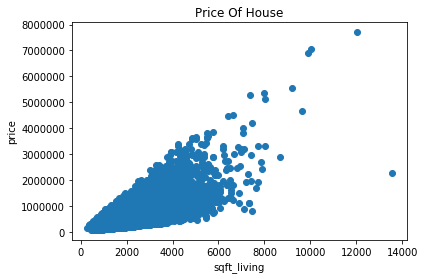

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.title('Price Of House')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[283.96855737]]
[-48257.06345556]


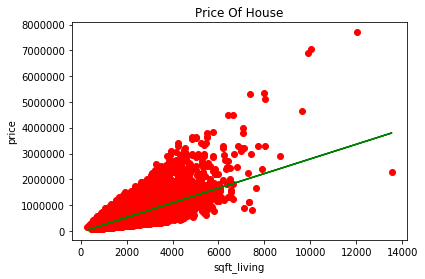

In [24]:
#Visualise Training set result
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lin_reg.predict(x_train), color = 'green')
plt.title('Price Of House')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [25]:
ypred=lin_reg.predict(x_test)  # the predictred values of y for the test dataset(x) 
ypred

array([[ 357817.97358056],
       [1277876.09945262],
       [ 360657.65915424],
       ...,
       [ 337940.17456481],
       [ 221513.06604396],
       [ 417451.37062782]])

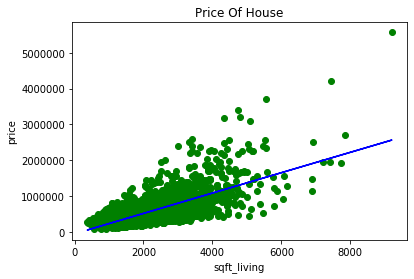

In [26]:
# Visualize the test model
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test,lin_reg.predict(x_test), color = 'blue')
plt.title('Price Of House')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [27]:

from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.47915770799654933
The RMSE value is........ 248879.06143647007


In [29]:
import statsmodels.api as sm
x_lm = sm.add_constant(x)
lr=sm.OLS(y,x_lm).fit()
lr.params

array([-43580.74032709,    280.62356663])

In [30]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:01:09   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
x1           280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.709
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2) Price Vs Bedroom

In [31]:
x=df['bedrooms'].values.reshape(-1,1)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
ypred=lin_reg.predict(x_test)  # the predictred values of y for the test dataset(x) 
ypred

array([[373822.76436597],
       [620893.68268414],
       [373822.76436597],
       ...,
       [497358.22352506],
       [497358.22352506],
       [497358.22352506]])

In [33]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.08045757572566936
The RMSE value is........ 330690.0478733202


In [34]:
x_lm = sm.add_constant(x)
lr=sm.OLS(y,x_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2271.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:08:13   Log-Likelihood:            -3.0652e+05
No. Observations:               21613   AIC:                         6.131e+05
Df Residuals:                   21611   BIC:                         6.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.298e+05   8931.866     14.533      0.000    1.12e+05    1.47e+05
x1          1.217e+05   2554.304     47.651      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18859.406   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1199044.953
Skew:                           3.904   Prob(JB):                         0.00
Kurtosis:                      38.644   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3) Price vs bathrooms

In [38]:
x=df['bathrooms'].values.reshape(-1,1)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
ypred=lin_reg.predict(x_test)  # the predictred values of y for the test dataset(x) 
ypred

array([[386209.02923965],
       [829420.96596062],
       [196261.05635924],
       ...,
       [639472.9930802 ],
       [259577.04731937],
       [576157.00212006]])

In [40]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.2745034662728696
The RMSE value is........ 293733.1147146452


In [41]:
x_lm = sm.add_constant(x)
lr=sm.OLS(y,x_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     8229.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:09:54   Log-Likelihood:            -3.0412e+05
No. Observations:               21613   AIC:                         6.082e+05
Df Residuals:                   21611   BIC:                         6.083e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.071e+04   6210.669      1.724      0.085   -1465.059    2.29e+04
x1          2.503e+05   2759.528     90.714      0.000    2.45e+05    2.56e+05
==============================================================================
Omnibus:                    17286.361   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           887102.348
Skew:                           3.458   Prob(JB):                         0.00
Kurtosis:                      33.614   Cond. No.                         7.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Thus, the maximum R^2 is observed in Price Vs Sqft. So, it is the best model.

# Multiple Regression

In [43]:
x = df.iloc[:,1:]

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
mul_reg = LinearRegression()
mul_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
mul_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_pred = mul_reg.predict(x_test)
#pd.concat([y_pred, y_test], axis=1)
pred=list(y_pred)
actual=np.array(y_test)
actual=list(actual)

In [48]:
d=pd.DataFrame(
    {'Predicted charges': pred,
     'Actual charges': actual
    })

In [64]:
z=pd.concat([x_test,d.reindex(x_test.index)], axis=1)
z

,sqft_living,bedrooms,bathrooms,floors,Predicted charges,Actual charges
17384,1430,2,1.50,3.0,NaN,NaN
722,4670,4,3.25,2.0,[547646.2423799424],[585000]
2680,1440,2,0.75,1.0,[744379.1384787697],[750000]
18754,1130,2,1.00,1.0,NaN,NaN
14554,3180,4,2.50,2.0,NaN,NaN
...,...,...,...,...,...,...
5427,3090,4,3.25,2.0,NaN,NaN
16547,1260,3,1.75,1.0,NaN,NaN
4585,1360,3,2.50,2.0,NaN,NaN
17762,950,3,1.00,1.5,NaN,NaN


In [50]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
r_square=r2_score(y_test,y_pred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.49571065104477097
The RMSE value is........ 244892.30412806544


In [51]:
x_lm=sm.add_constant(x)
lr=sm.OLS(y,x_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     5554.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:30:34   Log-Likelihood:            -2.9996e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21608   BIC:                         6.000e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.467e+04   7679.122      9.724      0.000    5.96e+04    8.97e+04
sqft_living   309.3932      3.087    100.228      0.000     303.343     315.444
bedrooms    -5.785e+04   2347.323    -24.644      0.000   -6.24e+04   -5.32e+04
bathrooms    7853.5235   3814.223      2.059      0.040     377.365    1.53e+04
floors        200.4943   3775.505      0.053      0.958   -7199.774    7600.763
==============================================================================
Omnibus:                    14450.413   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           494760.938
Skew:                           2.739   Prob(JB):                         0.00
Kurtosis:                      25.790   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""